In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_sp2020 = pd.read_csv('shopee_data.csv')

In [4]:
df_sp2020.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'month', 'date', 'market_shop', 'brand',
       'platform', 'channel', 'campaign', 'ad_content', 'visits',
       'unique_visitors', 'atc_qty', 'atc_value_usd', 'unique_buyers',
       'shop_new_buyers', 'orders', 'items_sold', 'cr', 'gmv_usd', 'gmv_php'],
      dtype='object')

In [58]:
(set(list(df_sp2020['Brand'])))

{'Enfagrow', 'Lactum', 'RB H&B', 'RB Wellness', 'Sustagen', 'Veet'}

In [59]:
df_sp2020 = df_sp2020[(df_sp2020['Brand'] == 'Enfagrow') | 
          (df_sp2020['Brand'] == 'Lactum') | (df_sp2020['Brand'] == 'Sustagen')]
df_sp2020

,Unnamed: 0,Month,Date,Market/Shop,Brand,Platform,Channel,Campaign,Ad Content,Visits,Unique Visitors,ATC Qty,ATC Value(USD),Unique Buyers,Shop New Buyers,Orders,Items sold,CR%,GMV(USD),GMV(Local Currency)
0,0,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Facebook,s254612379_ss_ph_fb03_bu-lactum2020-programs,dec-carousel-static,1725,1724,0,0.00,0,0,0,0,0.00%,0.00,0.0
1,1,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Instagram,s254612379_ss_ph_ig04_bu-lactum2020-programs,dec-shopee-prebioticinulin-b-igstory,6,6,0,0.00,0,0,0,0,0.00%,0.00,0.0
2,2,December,2020-12-31,PH_ Enfagrow Official Store 254644909,Enfagrow,all,Facebook Collaborative Ads,s254644909_ss_ph_fbc2_enfagrow-crosssell,brandday-dec2020-3,0,0,0,0.00,1,0,1,1,0.00%,67.97,3273.0
3,3,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Facebook Collaborative Ads,s254612379_ss_ph_fbc2_lactum-crossell,featureday-dec2020-2,0,0,2,114.28,0,0,0,0,0.00%,0.00,0.0
4,4,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,adcolony,s254612379_ss_ph_othr_bu-lactum2020-programs,adcolonyvitcprebioinulin-hdvideowithdynamic,8,8,0,0.00,0,0,0,0,0.00%,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9786,January,2020-01-01,PH_Lactum Official Store 69038616,Lactum,all,Facebook Collaborative Ads,s69038616_ss_ph_fbca_lactum-christmas,save,22,13,0,0.00,0,0,0,0,0.00%,0.00,0.0
9787,9787,January,2020-01-01,PH_Lactum Official Store 69038616,Lactum,all,Facebook Collaborative Ads,s69038616_ss_ph_fbca_lactum-12.12,b2g1,57,37,0,0.00,0,0,0,0,0.00%,0.00,0.0
9789,9789,January,2020-01-01,PH_Lactum Official Store 69038616,Lactum,all,Facebook Collaborative Ads,s69038616_ss_ph_fbca_lactum-sbd-dec,save,133,85,16,230.43,7,3,7,13,9.77%,197.45,10027.0
9790,9790,January,2020-01-01,PH_Sustagen Official Store 82245607,Sustagen,all,Facebook Collaborative Ads,s82245607_ss_ph_fbca_sustagen-12.12,save,2,2,0,0.00,0,0,0,0,0.00%,0.00,0.0


In [60]:
df_sp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9158 entries, 0 to 9791
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9158 non-null   int64  
 1   Month                9158 non-null   object 
 2   Date                 9158 non-null   object 
 3   Market/Shop          9158 non-null   object 
 4   Brand                9158 non-null   object 
 5   Platform             9158 non-null   object 
 6   Channel              9158 non-null   object 
 7   Campaign             9158 non-null   object 
 8   Ad Content           9158 non-null   object 
 9   Visits               9158 non-null   int64  
 10  Unique Visitors      9158 non-null   int64  
 11  ATC Qty              9158 non-null   int64  
 12  ATC Value(USD)       9158 non-null   float64
 13  Unique Buyers        9158 non-null   int64  
 14  Shop New Buyers      9158 non-null   int64  
 15  Orders               9158 non-null   i

In [61]:
df_sp2020['Date'] = pd.to_datetime(df_sp2020.Date)
df_sp2020 = df_sp2020.sort_values(by='Date')


In [62]:
df_sp2020.columns

Index(['Unnamed: 0', 'Month', 'Date', 'Market/Shop', 'Brand', 'Platform',
       'Channel', 'Campaign', 'Ad Content', 'Visits', 'Unique Visitors',
       'ATC Qty', 'ATC Value(USD)', 'Unique Buyers', 'Shop New Buyers',
       'Orders', 'Items sold', 'CR%', 'GMV(USD)', 'GMV(Local Currency)'],
      dtype='object')

In [63]:
dict1 = {'Month': 'month', 'Date': 'date', 'Brand':'brand',
         'Platform':'platform', 'Channel':'channel',
         'Campaign':'campaign', 'Ad Content':'ad_content',
         'Visits':'visits', 'Market/Shop':'market_shop',
         'Unique Visitors':'unique_visitors', 'ATC Qty':'atc_qty',
         'ATC Value(USD)':'atc_value_usd', 'Unique Buyers':'unique_buyers',
         'Shop New Buyers':'shop_new_buyers', 'Orders':'orders',
         'Items sold':'items_sold', 'CR%':'cr',
         'GMV(USD)':'gmv_usd', 'GMV(Local Currency)':'gmv_php'}

df_sp2020 = df_sp2020.rename(columns=dict1)
df_sp2020

,Unnamed: 0,month,date,market_shop,brand,platform,channel,campaign,ad_content,visits,unique_visitors,atc_qty,atc_value_usd,unique_buyers,shop_new_buyers,orders,items_sold,cr,gmv_usd,gmv_php
9791,9791,January,2020-01-01,PH_Lactum Official Store 69038616,Lactum,all,Facebook Collaborative Ads,s69038616_ss_ph_fbca_lactum-12.12,save,54,37,1,31.47,0,0,0,0,0.00%,0.00,0.0
9782,9782,January,2020-01-01,PH_Enfagrow A+ Four Official Store 69027083,Enfagrow,all,Facebook Collaborative Ads,s69027083_ss_ph_fbca_enfagrow-christmas,save,28,18,2,27.77,0,0,0,0,0.00%,0.00,0.0
9783,9783,January,2020-01-01,PH_Enfagrow A+ Four Official Store 69027083,Enfagrow,all,Facebook Collaborative Ads,s69027083_ss_ph_fbca_enfagrow-sbd-dec,save,112,68,2,72.39,1,1,1,1,0.89%,35.50,1803.0
9784,9784,January,2020-01-01,PH_Sustagen Official Store 82245607,Sustagen,all,Facebook Collaborative Ads,s82245607_ss_ph_fbca_sustagen-sbd-dec,save,16,12,0,0.00,0,0,0,0,0.00%,0.00,0.0
9790,9790,January,2020-01-01,PH_Sustagen Official Store 82245607,Sustagen,all,Facebook Collaborative Ads,s82245607_ss_ph_fbca_sustagen-12.12,save,2,2,0,0.00,0,0,0,0,0.00%,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,24,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Facebook Collaborative Ads,s254612379_ss_ph_fbc2_lactum-crossell,12-12-2020-dday3,0,0,2,44.28,0,0,0,0,0.00%,0.00,0.0
25,25,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Facebook Collaborative Ads,s254612379_ss_ph_fbc2_lactum-rmkt-be,featureday-dec2020-2,0,0,1,64.54,1,0,1,1,0.00%,69.45,3344.0
26,26,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,Google,s254612379_ss_ph_gddi_lactum-99-2020,99-display,2,2,0,0.00,0,0,0,0,0.00%,0.00,0.0
14,14,December,2020-12-31,PH_ Lactum Official Store 254612379,Lactum,all,innity,s254612379_ss_ph_othr_bu-lactum2020-programs,innityvitcprebioinulin-mobilecards,70,70,0,0.00,0,0,0,0,0.00%,0.00,0.0


In [64]:
len(list(set(df_sp2020['ad_content'].tolist())))

393

In [65]:
df_sp2020['ad_content'].value_counts()

save                                                                                                                1322
(not set)                                                                                                            524
12-12-teasing3                                                                                                       304
99-display                                                                                                           268
12-12-teasing2                                                                                                       233
                                                                                                                    ... 
lactumb18sku3                                                                                                          1
sustagenb5                                                                                                             1
lactumb23sku1                   

In [66]:
df_sp2020.cr = df_sp2020.cr.replace('%','', regex=True)
df_sp2020.cr = pd.to_numeric(df_sp2020.cr)
df_sp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9158 entries, 9791 to 0
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       9158 non-null   int64         
 1   month            9158 non-null   object        
 2   date             9158 non-null   datetime64[ns]
 3   market_shop      9158 non-null   object        
 4   brand            9158 non-null   object        
 5   platform         9158 non-null   object        
 6   channel          9158 non-null   object        
 7   campaign         9158 non-null   object        
 8   ad_content       9158 non-null   object        
 9   visits           9158 non-null   int64         
 10  unique_visitors  9158 non-null   int64         
 11  atc_qty          9158 non-null   int64         
 12  atc_value_usd    9158 non-null   float64       
 13  unique_buyers    9158 non-null   int64         
 14  shop_new_buyers  9158 non-null   int64  

In [67]:
# df_sp2020['month'] = pd.to_datetime(df_sp2020['month'], format='%m').dt.month_name().str.slice(stop=3)

In [68]:
grp = df_sp2020.groupby(df_sp2020['month'], sort=False)['gmv_php'].sum()
grp

month
January       956473.00
February     1417639.00
March        1046243.00
April        3903757.00
May           685133.00
June         1411033.00
July          867556.00
August         37510.00
September     149080.00
October      2803936.00
November     2872042.69
December     2246147.00
Name: gmv_php, dtype: float64

In [69]:
df_sp2020.isnull().values.any()

False

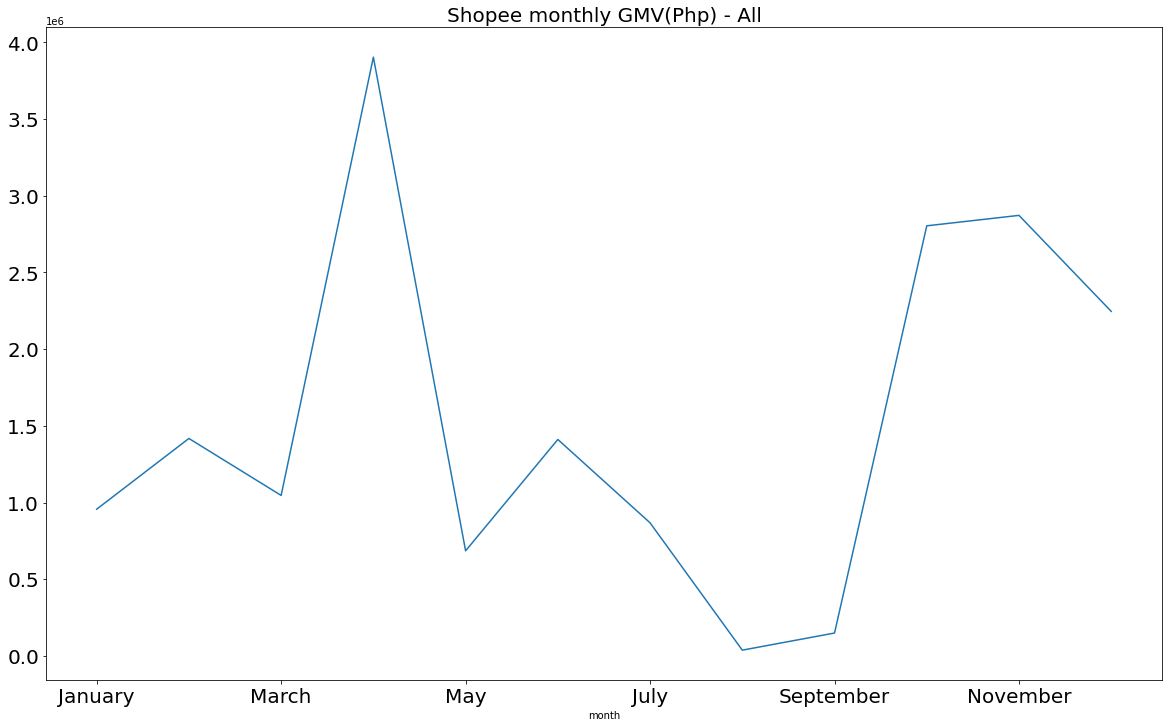

In [70]:
grp.plot(figsize=(20, 12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Shopee monthly GMV(Php) - All', fontsize=20)
plt.show()

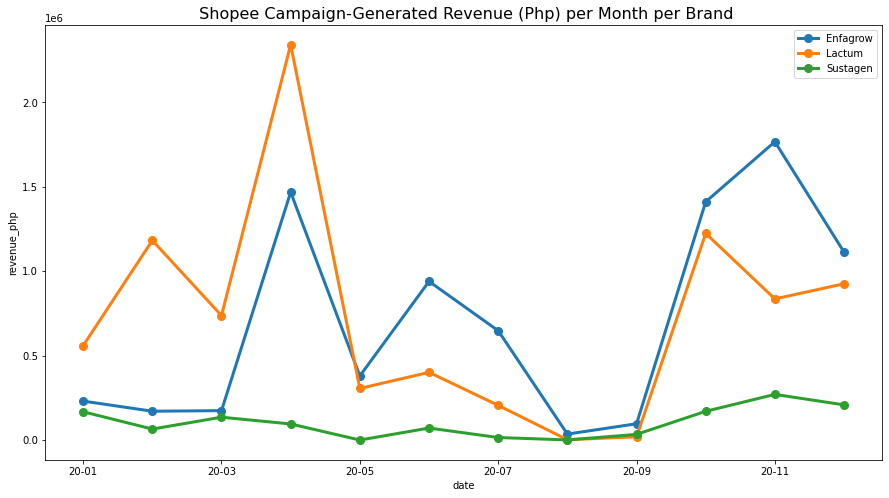

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp2020, values='gmv_php', 
                   index=df_sp2020['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)


d['Enfagrow'].plot(kind="line", figsize=(15,8), color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfagrow')
d['Lactum'].plot(kind="line", figsize=(15,8), color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", figsize=(15,8), color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('revenue_php')
ax.set_xlabel('date')
ax.set_title(' Shopee Campaign-Generated Revenue (Php) per Month per Brand', fontsize=16);

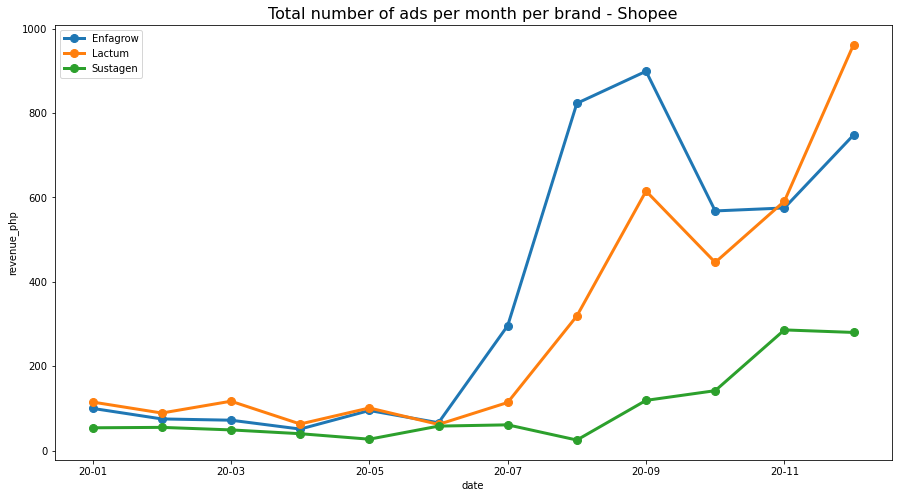

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_sp2020, values='campaign', 
                   index=df_sp2020['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=lambda x: len(x))


d1['Enfagrow'].plot(kind="line", figsize=(15,8), color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfagrow')
d1['Lactum'].plot(kind="line", figsize=(15,8), color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d1['Sustagen'].plot(kind="line", figsize=(15,8), color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('revenue_php')
ax.set_xlabel('date')
ax.set_title('Total number of ads per month per brand - Shopee', fontsize=16);

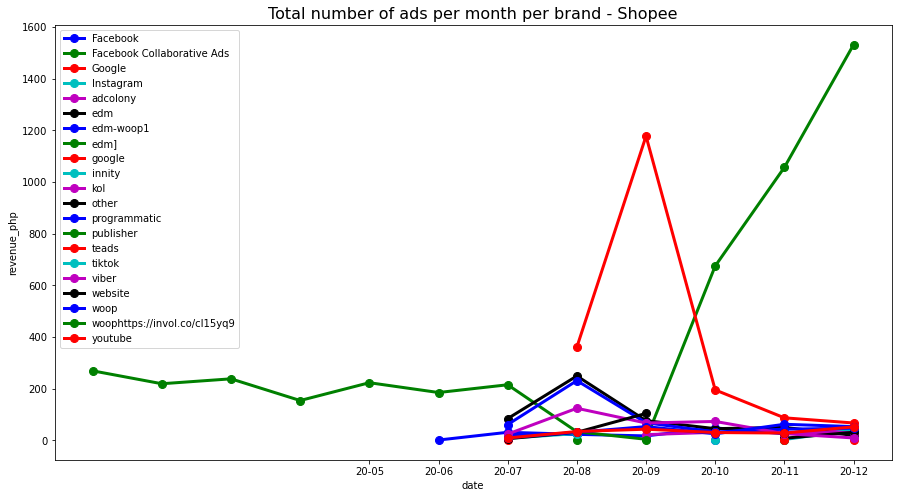

In [73]:
from itertools import cycle
fig = plt.figure()
ax = fig.add_subplot(111)

d2 = pd.pivot_table(df_sp2020, values='campaign', 
                   index=df_sp2020['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=lambda x: len(x))



cycol = cycle('bgrcmk')

for item in d2.columns.tolist():
    d2[item].plot(kind="line", figsize=(15,8), color=next(cycol), marker='o', linewidth=3, markersize=8, ax=ax, label=item)
# d1['Lactum'].plot(kind="line", figsize=(15,8), color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
# d1['Sustagen'].plot(kind="line", figsize=(15,8), color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('revenue_php')
ax.set_xlabel('date')
ax.set_title('Total number of ads per month per brand - Shopee', fontsize=16);


In [74]:
df_sp2020.to_csv('shopee_data.csv')

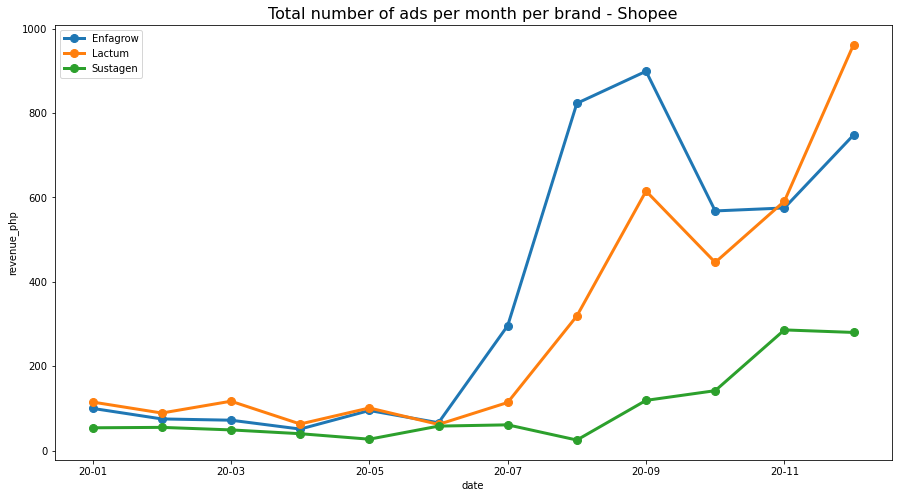

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_sp2020, values='campaign', 
                   index=df_sp2020['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=lambda x: len(x))


d1['Enfagrow'].plot(kind="line", figsize=(15,8), color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfagrow')
d1['Lactum'].plot(kind="line", figsize=(15,8), color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d1['Sustagen'].plot(kind="line", figsize=(15,8), color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('revenue_php')
ax.set_xlabel('date')
ax.set_title('Total number of ads per month per brand - Shopee', fontsize=16);

In [76]:
df_rev_per_campaign = df_sp2020.groupby(df_sp2020['campaign'])['gmv_php'].sum()

In [77]:
df_rev_per_campaign.values

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.8726000e+04,
       8.9480000e+03, 4.4950000e+03, 1.8011000e+04, 5.5297000e+04,
       2.7539000e+04, 9.4780690e+04, 7.9309040e+04, 5.3986000e+04,
       8.5800000e+04, 9.6739000e+04, 3.0984000e+04, 1.3662000e+04,
       7.3168000e+04, 5.0600000e+02, 5.2780000e+03, 3.1056000e+04,
       0.0000000e+00, 6.9520000e+03, 7.8140000e+03, 0.0000000e+00,
       7.1180000e+03, 1.9916702e+05, 5.5542108e+05, 5.4111000e+04,
       1.7839654e+05, 4.2687400e+05, 1.7495462e+05, 9.3676000e+04,
       2.1599530e+05, 1.0107778e+05, 6.2604740e+04, 2.1537500e+05,
       3.0814800e+05, 1.0937000e+04, 1.1298300e+05, 1.5512300e+05,
       3.5994000e+04, 2.5040700e+05, 2.1484288e+05, 1.4217700e+05,
       3.3212800e+05, 0.0000000e+00, 0.0000000e+00, 3.9270000e+03,
       1.3460000e+03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.1739000e+04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.9540000e

In [78]:
type(df_rev_per_campaign)

pandas.core.series.Series

In [79]:
df_rev_per_campaign.sort_values(ascending=False)[:5]

campaign
s69038616_ss_ph_fbca_lactum-mar             2020259.00
s69027083_ss_ph_fbca_enfagrow-apr           1205178.00
s69038616_ss_ph_fbca_lactum-feb             1199900.00
s69038616_ss_ph_fbca_lactum-apr             1001437.00
s254644909_ss_ph_fbc2_enfagrow-crosssell     918034.96
Name: gmv_php, dtype: float64

In [80]:
df_lactum = df_sp2020[df_sp2020['brand'] == 'Lactum']
df_lactum_campaign = df_lactum.groupby(df_sp2020['campaign'])['gmv_php'].sum()

# EDA

# Top 5 campaigns in terms of GMV

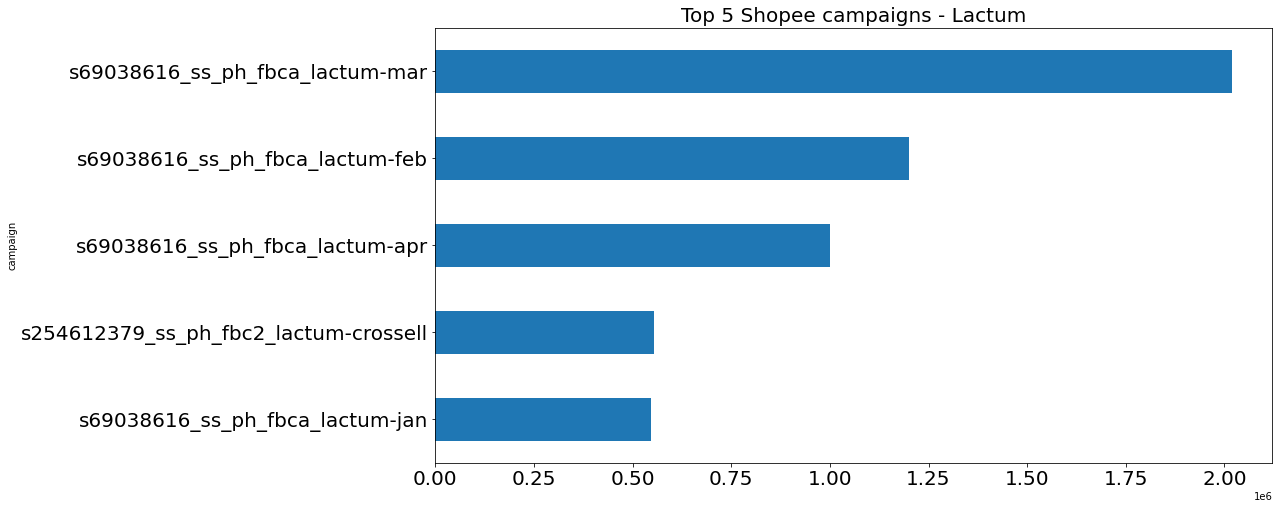

In [81]:
df_lactum = df_sp2020[df_sp2020['brand'] == 'Lactum']
df_lactum_campaign = df_lactum.groupby(df_sp2020['campaign'])['gmv_php'].sum()
df_lactum_campaign.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns - Lactum', fontsize=20)
plt.show()

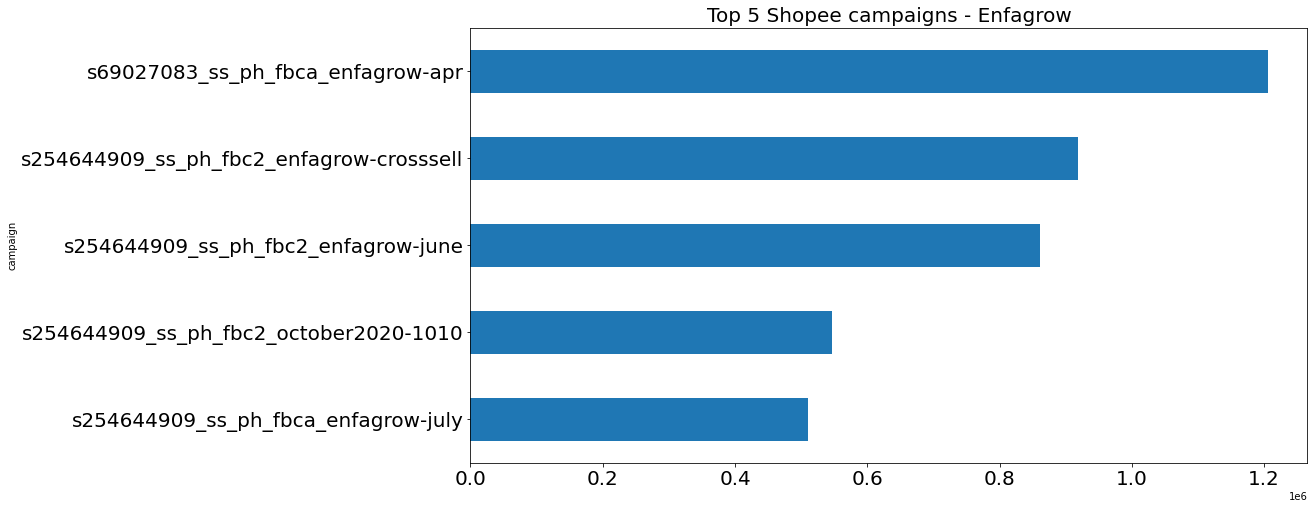

In [82]:
df_enfa = df_sp2020[df_sp2020['brand'] == 'Enfagrow']
df_enfa_campaign = df_enfa.groupby(df_sp2020['campaign'])['gmv_php'].sum()
df_enfa_campaign.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns - Enfagrow', fontsize=20)
plt.show()

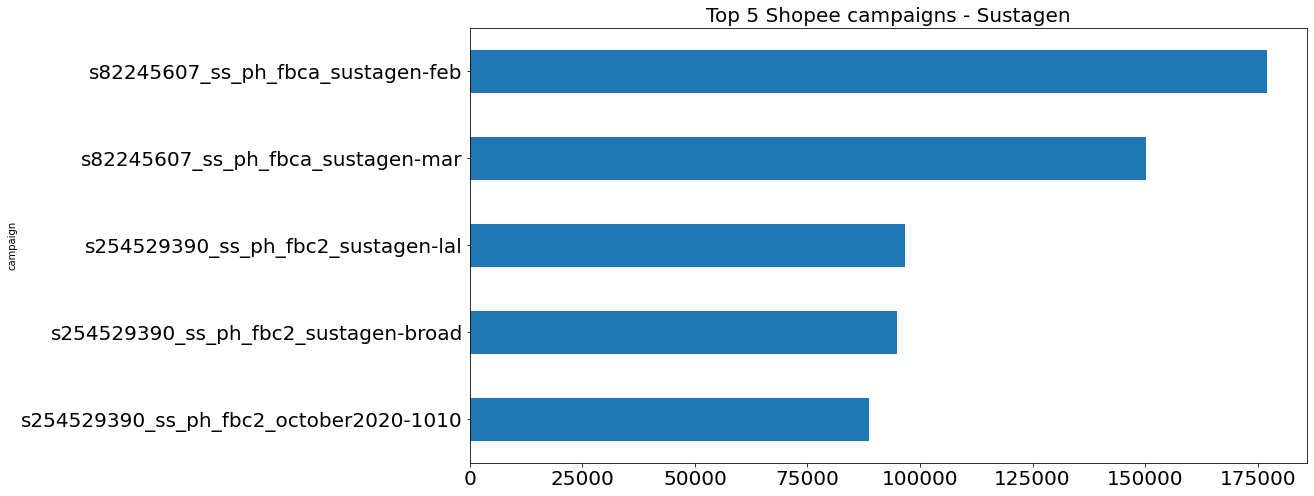

In [83]:
df_sus = df_sp2020[df_sp2020['brand'] == 'Sustagen']
df_sus_campaign = df_sus.groupby(df_sp2020['campaign'])['gmv_php'].sum()
df_sus_campaign.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns - Sustagen', fontsize=20)
plt.show()

In [84]:
df_enfa_campaign

campaign
s254644909_ss_ph_fb00_enfagrow-organicpost-2020       21444.00
s254644909_ss_ph_fb01_10-10-cobranding                11985.00
s254644909_ss_ph_fb02_10-10-cobranding                 7264.00
s254644909_ss_ph_fb02_organic                             0.00
s254644909_ss_ph_fb02_q4buads                             0.00
s254644909_ss_ph_fbc2_enfagrow-broad                 340389.52
s254644909_ss_ph_fbc2_enfagrow-crosssell             918034.96
s254644909_ss_ph_fbc2_enfagrow-cv                    138600.99
s254644909_ss_ph_fbc2_enfagrow-diapers               304128.79
s254644909_ss_ph_fbc2_enfagrow-enfastore             150543.22
s254644909_ss_ph_fbc2_enfagrow-june                  860348.00
s254644909_ss_ph_fbc2_enfagrow-rmkt-be               283836.92
s254644909_ss_ph_fbc2_enfagrow-rmkt-care              88414.42
s254644909_ss_ph_fbc2_enfagrow-rmkt-sis              217615.74
s254644909_ss_ph_fbc2_enfagrow-rmkt-vca2c90d         204276.08
s254644909_ss_ph_fbc2_oct20sbd                

# Top 5 campaigns in terms of Number of Visits

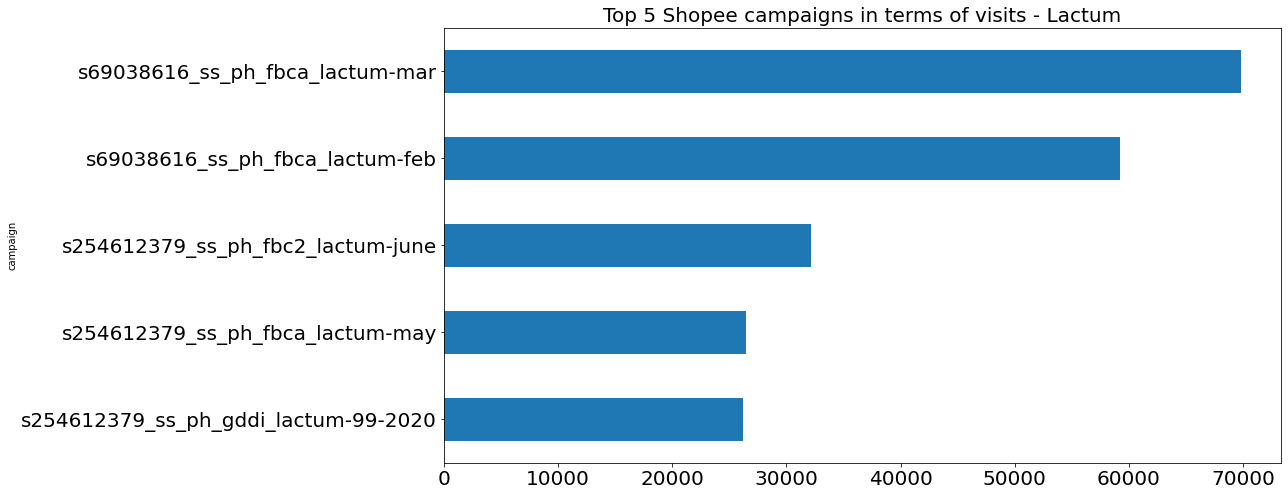

In [85]:
df_lactum = df_sp2020[df_sp2020['brand'] == 'Lactum']
df_lactum_visits = df_lactum.groupby(df_sp2020['campaign'])['visits'].sum()
df_lactum_visits.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns in terms of visits - Lactum', fontsize=20)
plt.show()

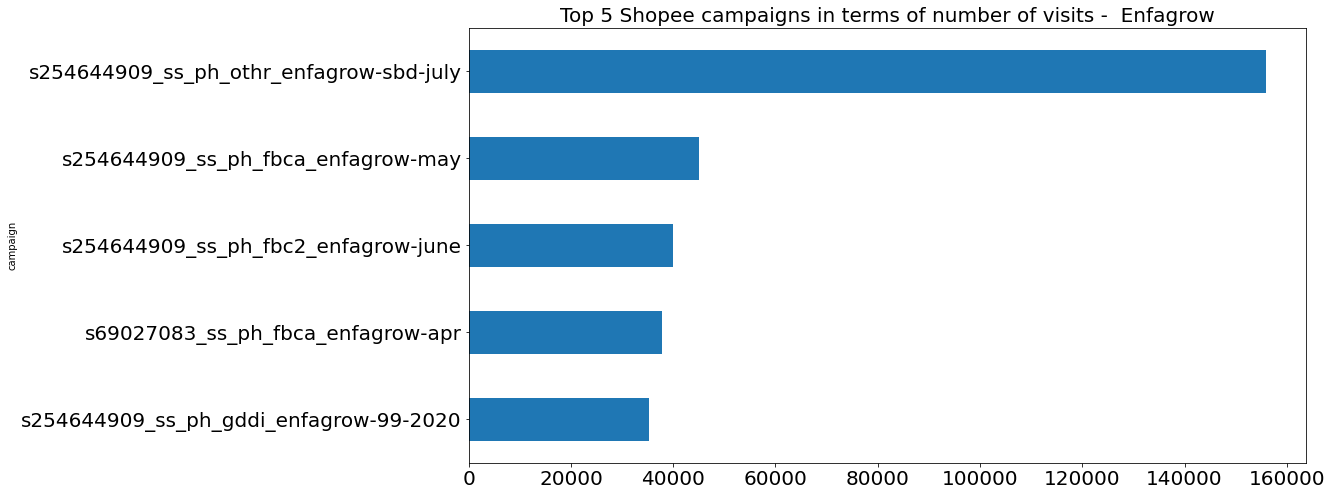

In [86]:
df_enfa_visit = df_enfa.groupby(df_sp2020['campaign'])['visits'].sum()
df_enfa_visit.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns in terms of number of visits -  Enfagrow', fontsize=20)
plt.show()

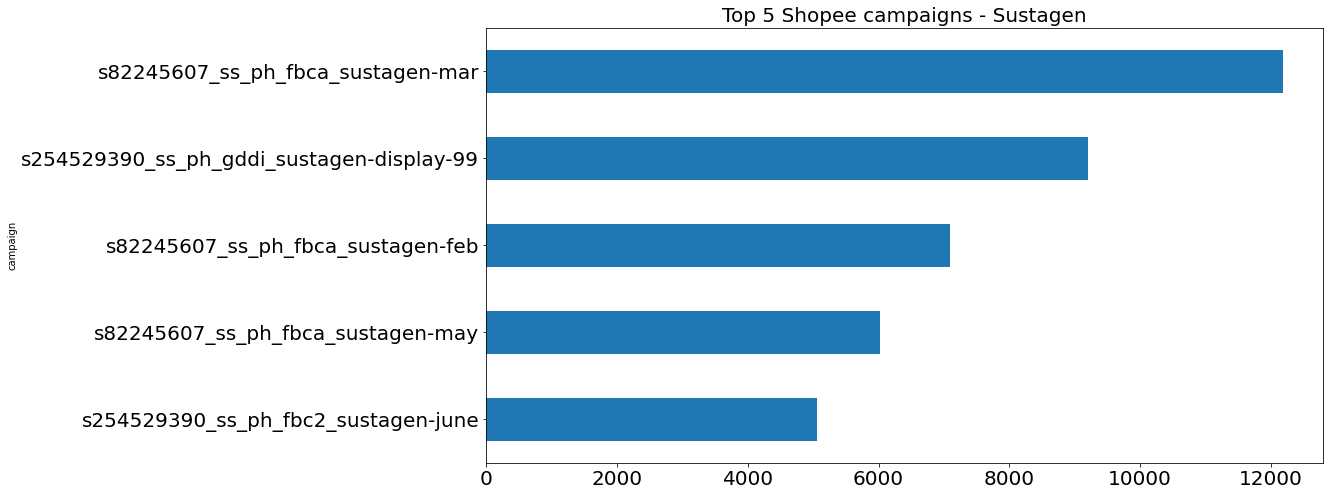

In [87]:
df_sus = df_sp2020[df_sp2020['brand'] == 'Sustagen']
df_sus_visit = df_sus.groupby(df_sp2020['campaign'])['visits'].sum()
df_sus_visit.sort_values(ascending=False)[:5][::-1].plot.barh(figsize=(15, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 5 Shopee campaigns - Sustagen', fontsize=20)
plt.show()

In [88]:
df_sp2020.columns

Index(['Unnamed: 0', 'month', 'date', 'market_shop', 'brand', 'platform',
       'channel', 'campaign', 'ad_content', 'visits', 'unique_visitors',
       'atc_qty', 'atc_value_usd', 'unique_buyers', 'shop_new_buyers',
       'orders', 'items_sold', 'cr', 'gmv_usd', 'gmv_php'],
      dtype='object')

In [89]:
df_sp2020.head()

,Unnamed: 0,month,date,market_shop,brand,platform,channel,campaign,ad_content,visits,unique_visitors,atc_qty,atc_value_usd,unique_buyers,shop_new_buyers,orders,items_sold,cr,gmv_usd,gmv_php
9791,9791,January,2020-01-01,PH_Lactum Official Store 69038616,Lactum,all,Facebook Collaborative Ads,s69038616_ss_ph_fbca_lactum-12.12,save,54,37,1,31.47,0,0,0,0,0.00,0.0,0.0
9782,9782,January,2020-01-01,PH_Enfagrow A+ Four Official Store 69027083,Enfagrow,all,Facebook Collaborative Ads,s69027083_ss_ph_fbca_enfagrow-christmas,save,28,18,2,27.77,0,0,0,0,0.00,0.0,0.0
9783,9783,January,2020-01-01,PH_Enfagrow A+ Four Official Store 69027083,Enfagrow,all,Facebook Collaborative Ads,s69027083_ss_ph_fbca_enfagrow-sbd-dec,save,112,68,2,72.39,1,1,1,1,0.89,35.5,1803.0
9784,9784,January,2020-01-01,PH_Sustagen Official Store 82245607,Sustagen,all,Facebook Collaborative Ads,s82245607_ss_ph_fbca_sustagen-sbd-dec,save,16,12,0,0.00,0,0,0,0,0.00,0.0,0.0
9790,9790,January,2020-01-01,PH_Sustagen Official Store 82245607,Sustagen,all,Facebook Collaborative Ads,s82245607_ss_ph_fbca_sustagen-12.12,save,2,2,0,0.00,0,0,0,0,0.00,0.0,0.0


In [90]:
df_sp2020_cnt = df_sp2020.groupby('month')['campaign'].count()
df_sp2020_cnt

month
April         154
August       1167
December     1990
February      219
January       269
July          471
June          186
March         238
May           223
November     1452
October      1156
September    1633
Name: campaign, dtype: int64

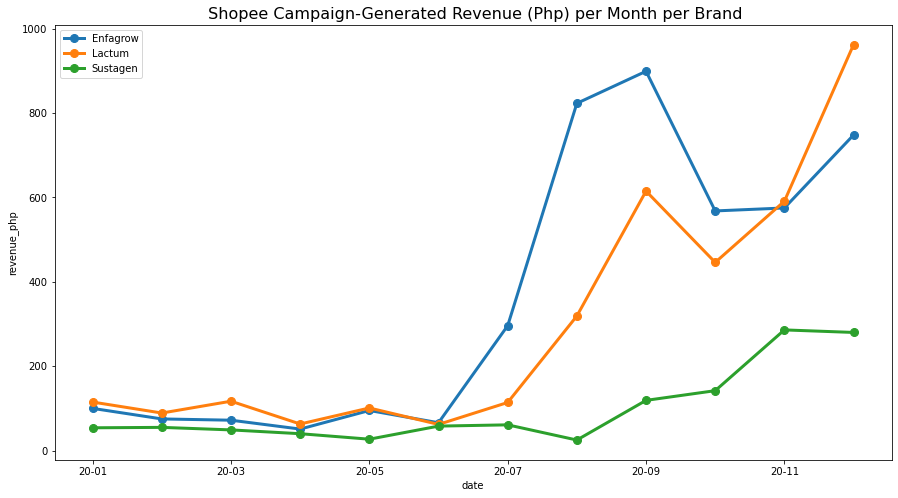

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_sp2020, values='campaign', 
                   index=df_sp2020['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=lambda x: len(x))

d1['Enfagrow'].plot(kind="line", figsize=(15,8), color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfagrow')
d1['Lactum'].plot(kind="line", figsize=(15,8), color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d1['Sustagen'].plot(kind="line", figsize=(15,8), color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('revenue_php')
ax.set_xlabel('date')
ax.set_title(' Shopee Campaign-Generated Revenue (Php) per Month per Brand', fontsize=16);

In [92]:
d1

brand,Enfagrow,Lactum,Sustagen
date,,,
20-01,100,115,54
20-02,75,89,55
20-03,72,117,49
20-04,51,63,40
20-05,95,101,27
20-06,66,62,58
20-07,296,114,61
20-08,823,319,25
20-09,899,615,119
